In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\SVI\AppData\Local\Temp\ipykernel_3052\555797462.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df = pd.read_csv("train.csv")

In [4]:
# column types
# Numerical - age,fare,passegerId
# Catagorical - survived,Pclass,Sex,Sibsp,parch,Embarked
# Mixed - name,ticket,cabin

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# univariate analysis
# focuses on analysing each column in the dataset

Age
-conclusion
- age is normally(almost) distributed
- almost 20% of the values are missing
- There are some ouliers

In [7]:
df['Age'].isnull().sum()/len(df['Age'])
# around 19% data doesnot contain age

0.19865319865319866

In [8]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<Axes: ylabel='Frequency'>

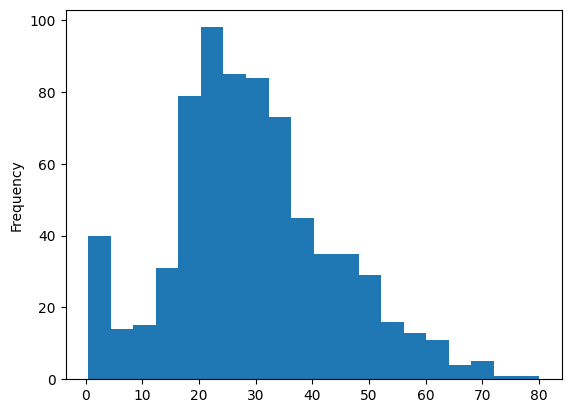

In [9]:
age = df['Age']
age.plot(kind='hist',bins=20)

<Axes: ylabel='Density'>

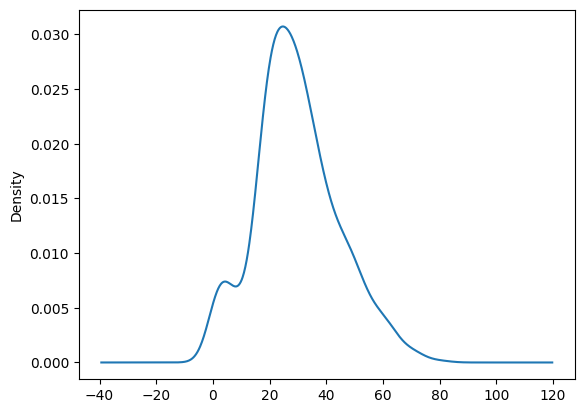

In [10]:
age.plot(kind='kde')

In [11]:
age.skew()
# if it is near zero, it's skeewness in low which is good

0.38910778230082704

<Axes: >

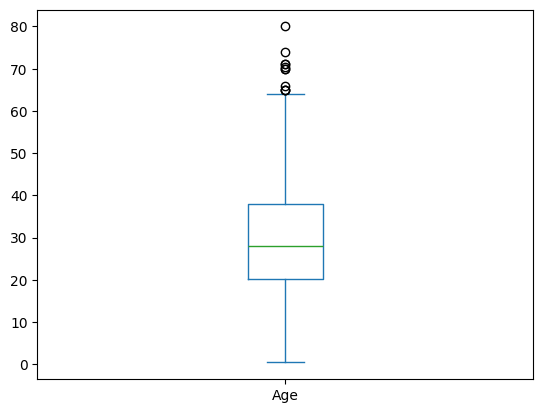

In [12]:
age.plot(kind='box')

fare

- conclusion
1. data is highly skewed
2. fare column actually contains the group fare not the individual 
3. we need to make a new column for individual fare

In [13]:
fare = df['Fare']

In [14]:
fare.isnull().sum()

0

In [15]:
fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<Axes: ylabel='Frequency'>

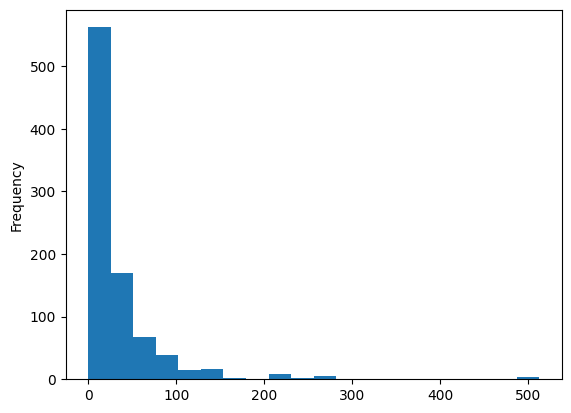

In [16]:
fare.plot(kind='hist',bins=20)

<Axes: ylabel='Density'>

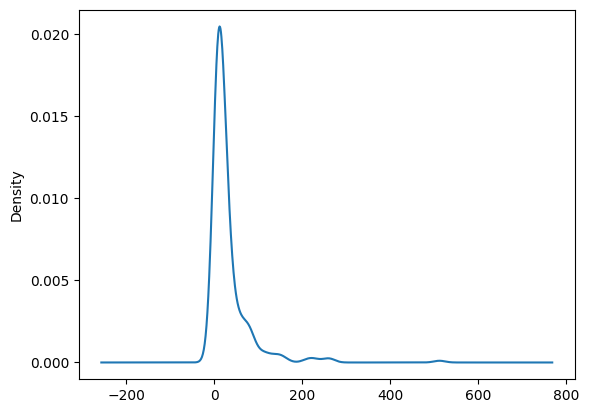

In [17]:
fare.plot(kind='kde')

In [18]:
fare.skew()

4.787316519674893

<Axes: >

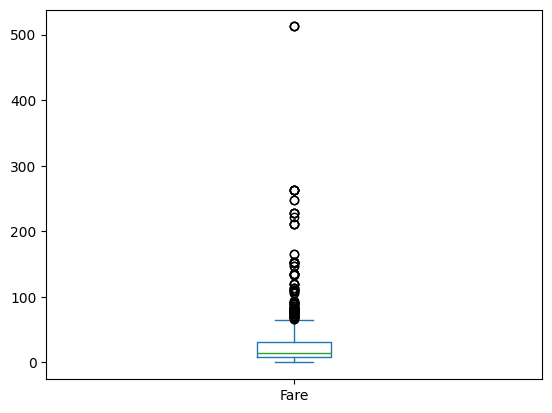

In [19]:
fare.plot(kind='box') # to find the outliers

In [20]:
df[fare>300]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


Univariate data analysis on catagotical columns

1. descriptive statistics
2. visualization count plots and pie charts 
3. check for missing values

In [21]:
# survived

# conclusion
# 1. more than 61 % people died


In [22]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived'>

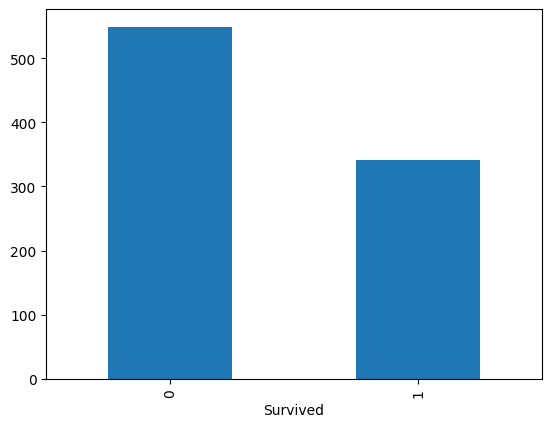

In [23]:
df['Survived'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

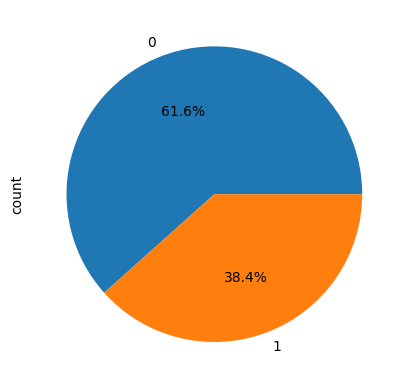

In [24]:
df['Survived'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [25]:
df['Survived'].isnull().sum()

0

Pclass

conclusion
1. here we can see that there are more passengers traveled in the 1st class rather than 2nd class which is unusual

In [26]:
pclass = df['Pclass']

In [27]:
pclass.isnull().sum()

0

In [28]:
pclass.value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

<Axes: xlabel='Pclass'>

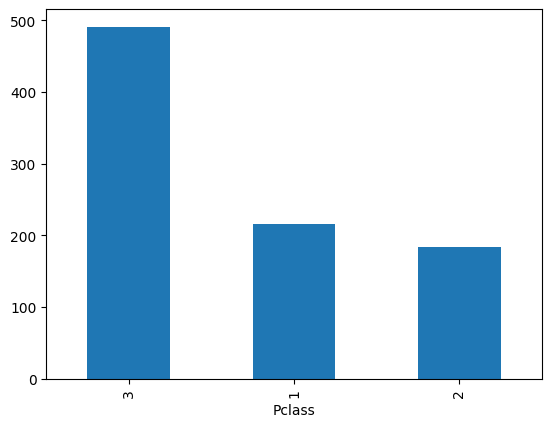

In [29]:
pclass.value_counts().plot(kind='bar')

<Axes: ylabel='count'>

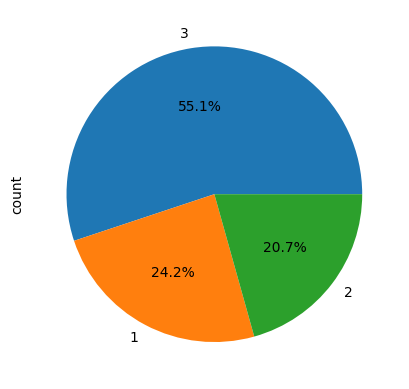

In [30]:
pclass.value_counts().plot(kind='pie',autopct='%0.1f%%')

SEX

conclusion
1. 65 % male and 35 % female

In [31]:
s = df['Sex']

In [32]:
s.value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

<Axes: xlabel='Sex'>

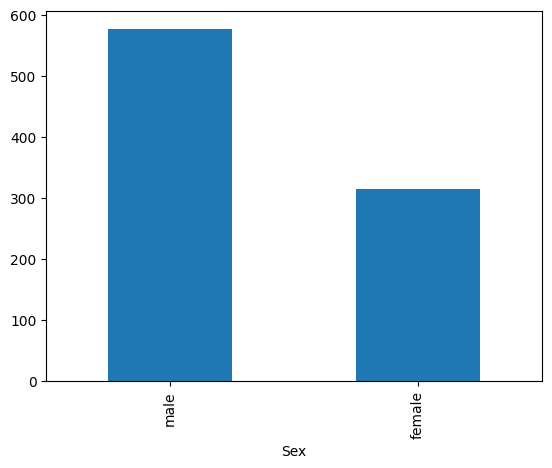

In [33]:
s.value_counts().plot(kind='bar')

<Axes: ylabel='count'>

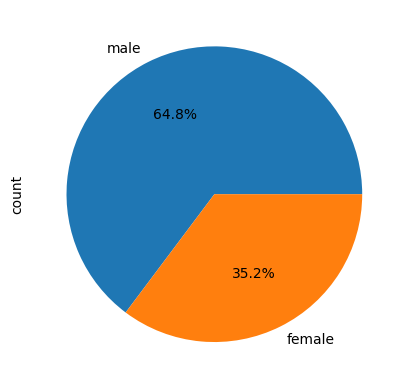

In [34]:
s.value_counts().plot(kind='pie',autopct='%0.1f%%')

SibSp

conclusion
1. parch and sibsp cloumn should be merged and we should combine them in one column called family_size
2. create a new col called is_alone for the people who are alone 
here we are creating the new column which is called feature engineering

In [35]:
sip  = df['SibSp']

In [36]:
sip.value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

<Axes: xlabel='SibSp'>

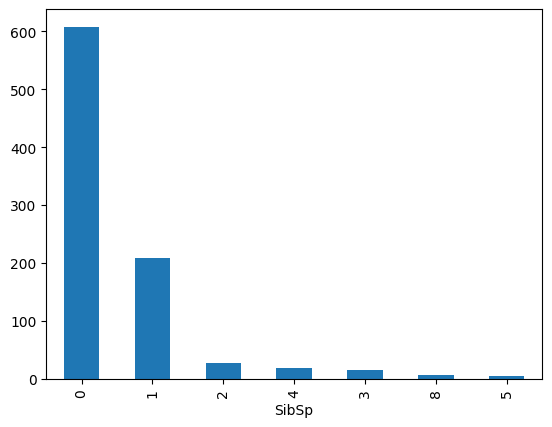

In [37]:
sip.value_counts().plot(kind='bar')

<Axes: ylabel='count'>

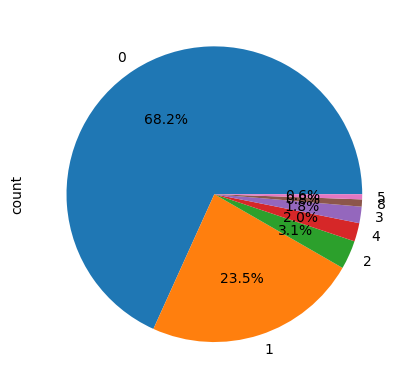

In [38]:
sip.value_counts().plot(kind='pie',autopct='%0.1f%%')

Parch

In [39]:
df['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [40]:
df['Parch'].isnull().sum()

0

<Axes: xlabel='Parch'>

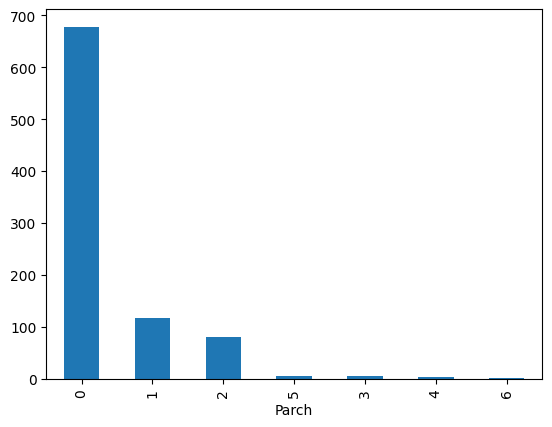

In [41]:
df['Parch'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

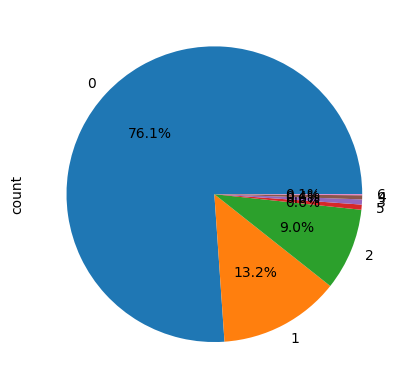

In [42]:
df['Parch'].value_counts().plot(kind='pie',autopct='%0.1f%%')

Embarked

In [43]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

<Axes: xlabel='Embarked'>

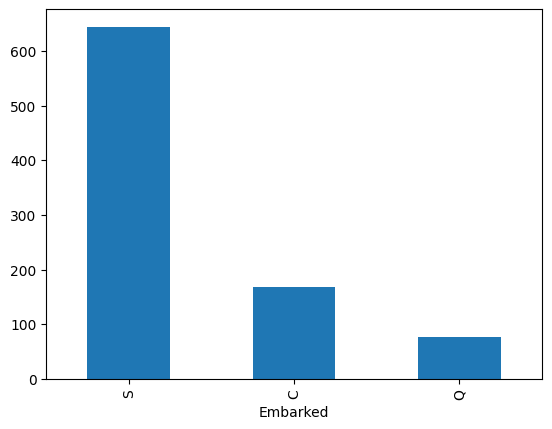

In [44]:
df['Embarked'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

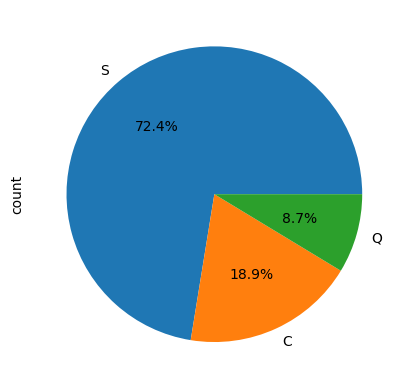

In [45]:
df['Embarked'].value_counts().plot(kind='pie',autopct='%0.1f%%')

Mixed cloumns
1. need to feature engineer for better analysis

Bivariate Analysis

- select two cols
1. num -num
- graphs like scatterplots,2D histplot,2D KDE plots
- check correlation coefficent to check linear realation

2. num-cat
- barplot,boxplot,kdeplot,violinplot and scatterplot
3. cat-cat
- heatmap,stacked barplot,treemaps

Survived - Pclass
- cat-cat

- create a cross tab

In [49]:
pd.crosstab(df['Survived'],df['Pclass'],normalize='columns')*100

Pclass,1,2,3
Survived,,,
0,37.037037,52.717391,75.763747
1,62.962963,47.282609,24.236253


here we can see that pclass 3 is the most dangerous class 

<Axes: xlabel='Pclass', ylabel='Survived'>

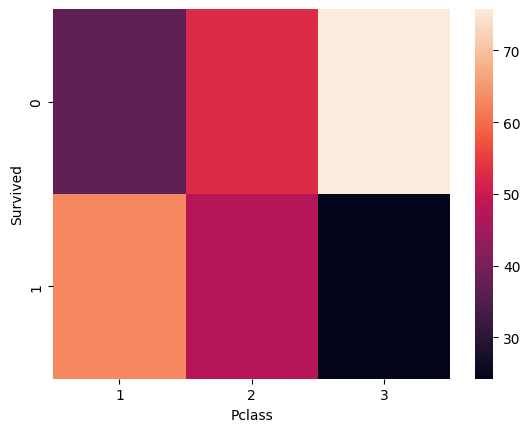

In [50]:
sns.heatmap(pd.crosstab(df['Survived'],df['Pclass'],normalize='columns')*100)

Survived - SEX

In [52]:
(pd.crosstab(df['Survived'],df['Sex'],normalize='columns')*100)

Sex,female,male
Survived,,
0,25.796178,81.109185
1,74.203822,18.890815


Survived - Embarked

In [53]:
(pd.crosstab(df['Survived'],df['Embarked'],normalize='columns')*100)

Embarked,C,Q,S
Survived,,,
0,44.642857,61.038961,66.304348
1,55.357143,38.961039,33.695652


In [54]:
(pd.crosstab(df['Sex'],df['Embarked'],normalize='columns')*100)

Embarked,C,Q,S
Sex,,,
female,43.452381,46.753247,31.521739
male,56.547619,53.246753,68.478261


In [56]:
(pd.crosstab(df['Pclass'],df['Embarked'],normalize='columns')*100)

Embarked,C,Q,S
Pclass,,,
1,50.595238,2.597403,19.720497
2,10.119048,3.896104,25.465839
3,39.285714,93.506494,54.813665


this is the reason (there are 50 % people who are in p class 1 from c) why 55 % people survived who were from C. 

conclusion 
- people who were in p class 1 were more safe.

Age vs Survived

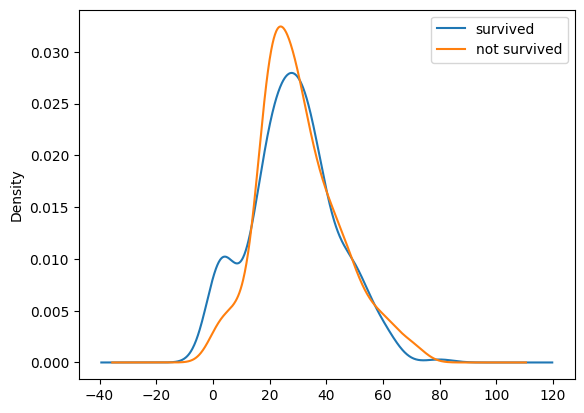

In [58]:
df[df['Survived'] == 1]['Age'].plot(kind='kde',label='survived')
df[df['Survived'] == 0]['Age'].plot(kind='kde',label='not survived')
plt.legend()
plt.show()